<a href="https://colab.research.google.com/github/Noor-Z1/Data-Analysis/blob/main/Insurance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Data Analysis**

## 1. Exploratory Data Analysis


In [ ]:
# load the dataset into pandas -> assuming the dataset is in csv format and uploaded to the colab notebook workspace or a github repo

import pandas as pd

# load the dataset from your local environment if it is downloaded
# replace the url with the path to your csv file in your local environment
url = "/content/insurance.csv"

df = pd.read_csv(url, header=0)
df.head()



,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,age,bmi,children,charges
index,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


As observed there is positive correlation between age and charges which we will analyze further. There is also some correlation between bmi and charges.

## 2. Relationship between Age and Insurance Charges

2.1 Regression Analysis

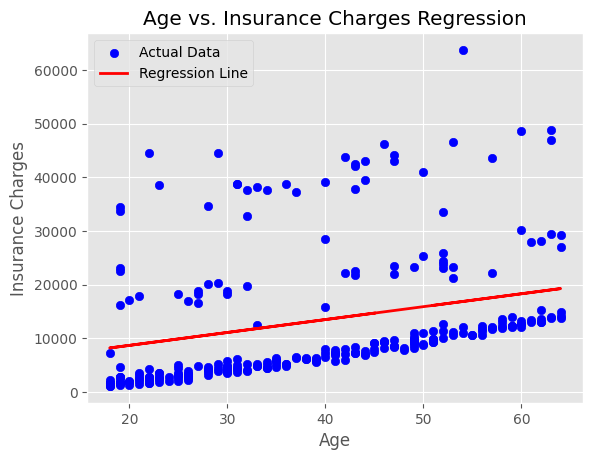

Mean Absolute Error: 9173.258196746589
Mean Squared Error: 135983957.4805469
Root Mean Squared Error: 11661.21595205864
R-squared: 0.12408973539501944


In [ ]:
# load the necessary libraries for visualization + regression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# regression of age vs charges
# Utilize linear regression to model the relationship between age and insurance charges.
# Evaluate the regression coefficients, R-squared, and statistical significance to assess the strength of the linear correlation.

# Select relevant columns
X = df['age'].values.reshape(-1, 1)  # Independent variable (age)
y = df['charges'].values              # Dependent variable (insurance charges)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Age vs. Insurance Charges Regression')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))



2.2 Scatter Plot

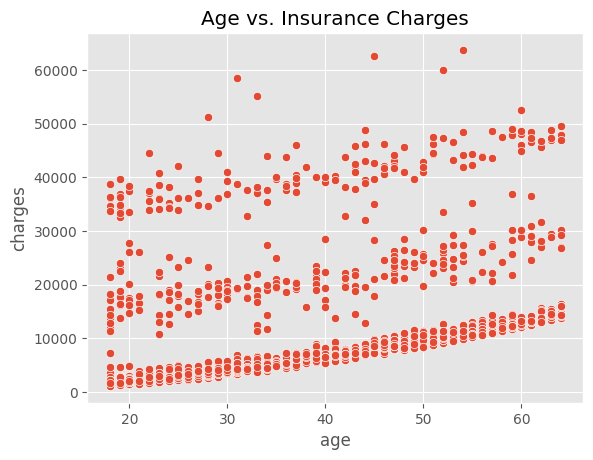

In [ ]:

# Include a scatter plot with a fitted regression line to visualize the linear correlation between age and insurance charges.

scatter_plot = sns.scatterplot(x='age', y='charges', data=df)
scatter_plot.set_title('Age vs. Insurance Charges')
plt.show()

**There is a strong correlation between age and charges, especially in the charging range between 0-$15000.**

2.3 Age Distribution Histogram

<Axes: title={'center': 'Age distribution'}, xlabel='age', ylabel='Count'>

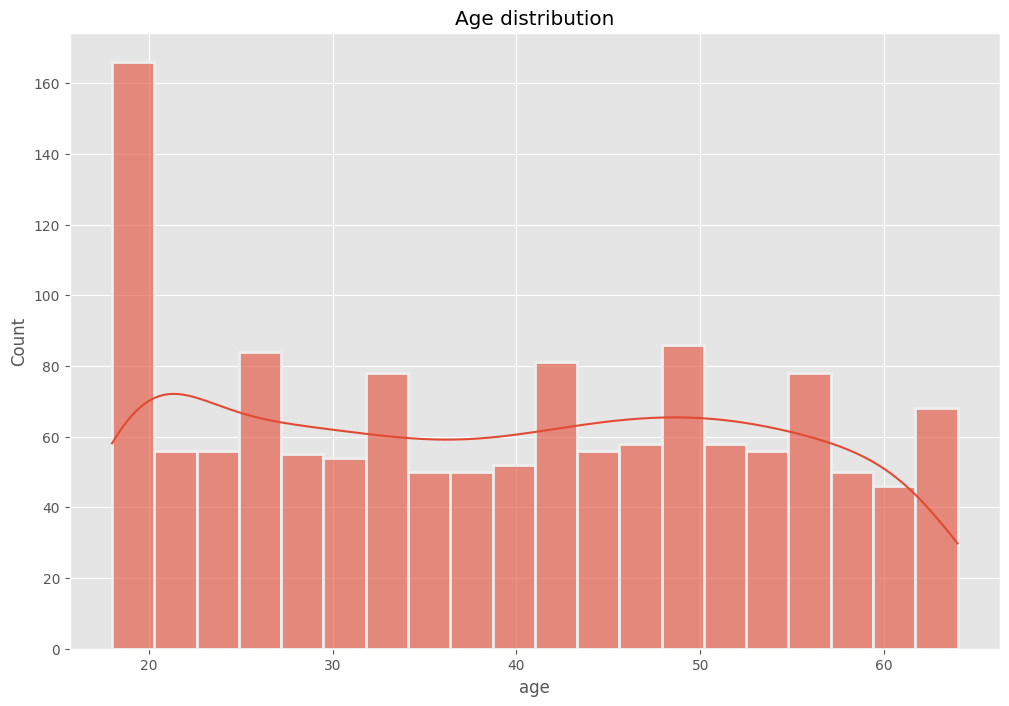

In [ ]:
# visualize Age distribution

plt.figure(figsize=(12,8))
plt.title('Age distribution')
sns.histplot(df,x='age',kde=True,alpha=0.6,bins=20,linewidth=2)

people between 18-20 are the biggest group in the dataset, as observed from the histogram.

2.4 Hypothesis Testing

In [ ]:
from scipy.stats import pearsonr


# Select relevant columns
age = df['age']
charges = df['charges']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(age, charges)

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Perform hypothesis testing
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between age and charges.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age and charges.")


Pearson Correlation Coefficient: 0.2990081933306476
P-value: 4.886693331718192e-29
Reject the null hypothesis. There is a significant correlation between age and charges.


## 3. Relationship between BMI and Insurance Charges

3.1 **Scatter plot**

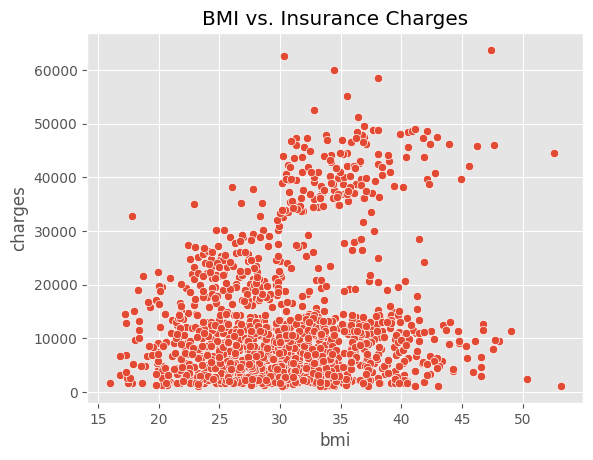

In [ ]:
# visualize BMI vs Insurance Charges

scatter_plot = sns.scatterplot(x='bmi', y='charges', data=df)
scatter_plot.set_title('BMI vs. Insurance Charges')
plt.show()

we can't make significant conclusions from this plot but we will see if there is any correlation between BMI and charges using hypothesis testing as well.

3.2 **BMI Distribution Histogram**

<Axes: title={'center': 'BMI distribution'}, xlabel='bmi', ylabel='Count'>

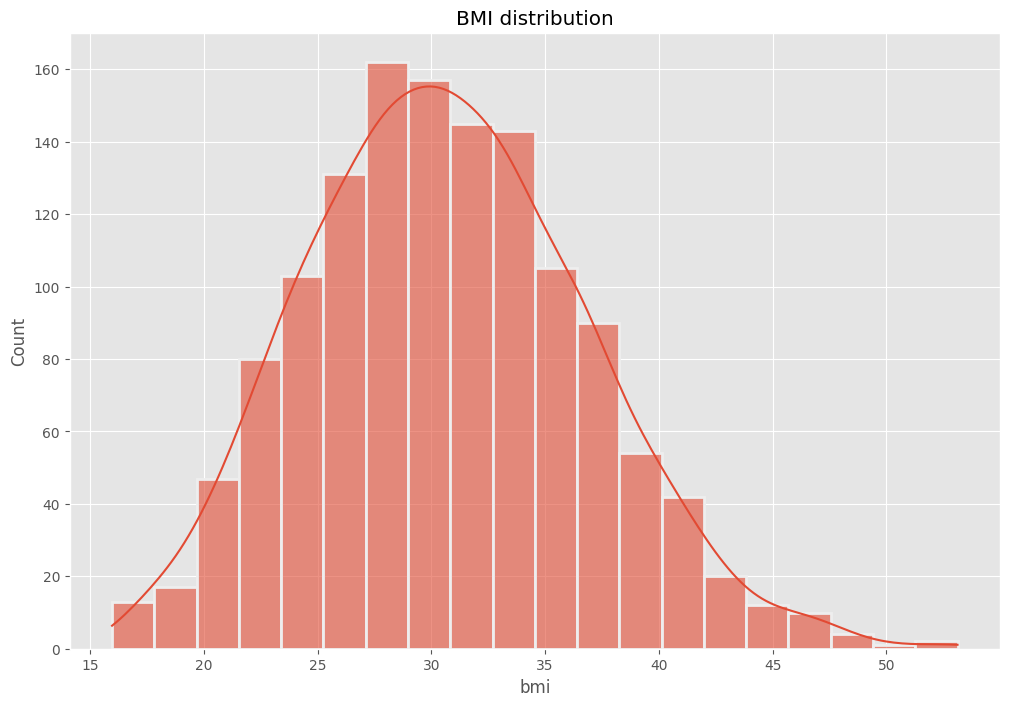

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize BMI distribution


plt.figure(figsize=(12,8))
plt.title('BMI distribution')
sns.histplot(df,x='bmi',kde=True,alpha=0.6,bins=20,linewidth=2)

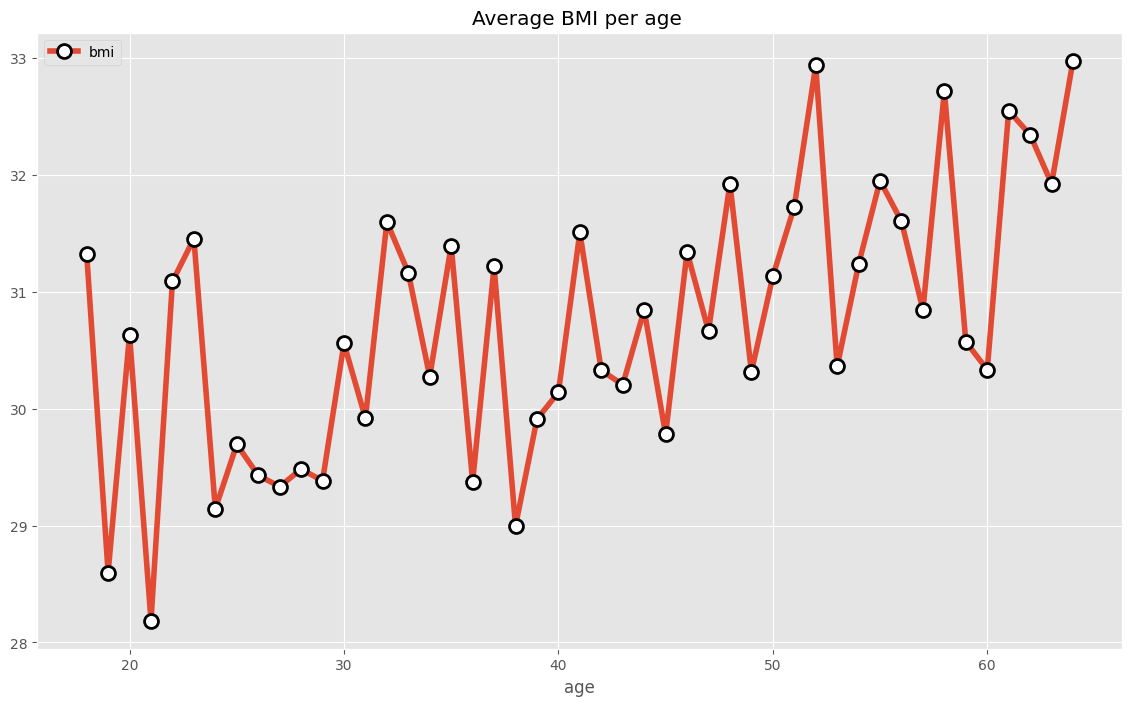

In [ ]:
# LETS VISUALIZE AVERAGE BMI PER AGE GROUP

plt.style.use('ggplot')
agebmi=pd.pivot_table(df,index='age',values='bmi',aggfunc='mean')
agebmi.plot(kind='line',figsize=(14,8),title='Average BMI per age ',marker="o",linewidth=4,markersize=10,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)
plt.show()


As observed from this, the average BMI score starts getting higher to unhealthier ranges.

**3.3 Hypothesis Testing**

In [ ]:
from scipy.stats import pearsonr

# Select relevant columns
bmi = df['bmi']
charges = df['charges']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(bmi, charges)

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Perform hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between BMI and charges.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between BMI and charges.")

Pearson Correlation Coefficient: 0.1983409688336288
P-value: 2.459085535116766e-13
Reject the null hypothesis. There is a significant correlation between BMI and charges.


3.4 Regression Analysis

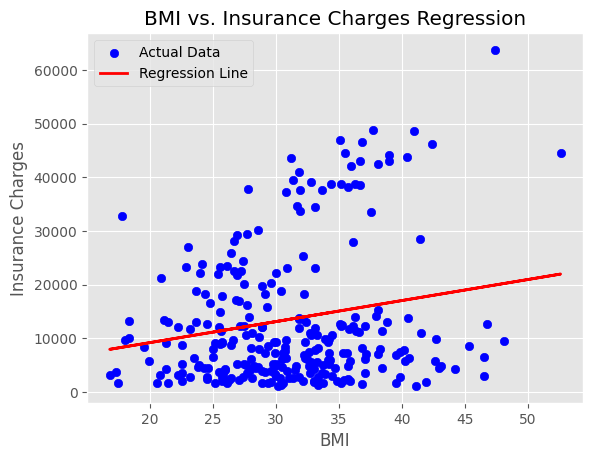

Mean Absolute Error: 9784.65259627133
Mean Squared Error: 149085057.03839505
Root Mean Squared Error: 12210.039190698571
R-squared: 0.03970193117941878


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Select relevant columns
X = df['bmi'].values.reshape(-1, 1)  # Independent variable (bmi)
y = df['charges'].values              # Dependent variable (insurance charges)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('BMI vs. Insurance Charges Regression')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))


## 4. Relationship between Smoking Status and Insurance Charges

In [ ]:
# first let's turn the categorical variable of smoker status into a binary variable

# map 'yes' to 1 and 'no' to 0
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

# display the updated dataframe
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,1,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,3,21984.47061
4,4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,3,0,3,10600.54830
1334,1334,18,0,31.920,0,0,4,2205.98080
1335,1335,18,0,36.850,0,0,2,1629.83350
1336,1336,21,0,25.800,0,0,1,2007.94500


4.1 Histogram to visualize the distribution of charges for smokers and non-smokers

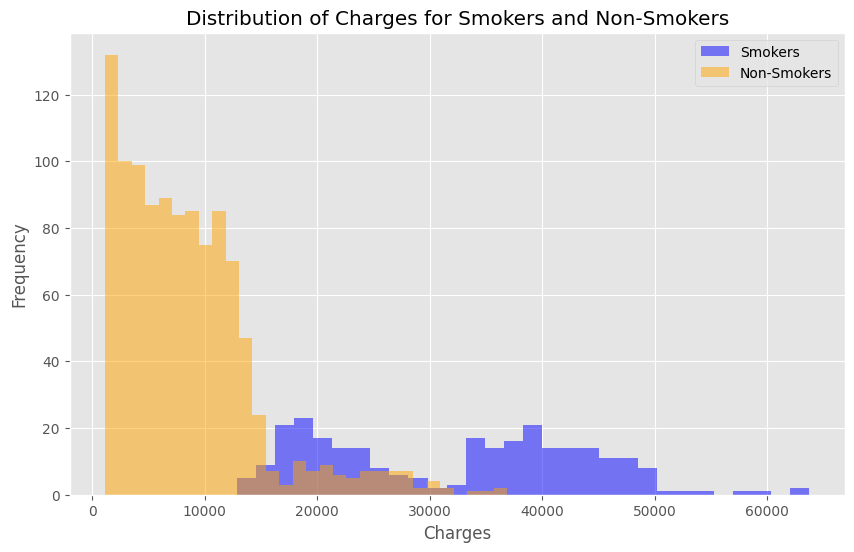

In [ ]:
# lets visualize the relationship between smoking status and charges

# Create two DataFrames for smokers and non-smokers
smokers = df[df['smoker'] == 1]
non_smokers = df[df['smoker'] == 0]

# Plot histograms for charges for both groups
plt.figure(figsize=(10, 6))
plt.hist(smokers['charges'], bins=30, alpha=0.5, label='Smokers', color='blue')
plt.hist(non_smokers['charges'], bins=30, alpha=0.5, label='Non-Smokers', color='orange')

# Add labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.legend()

# Display the plot
plt.show()


As seen with these histograms, the distribution of chargers for smokers is higher than that of non-smokers and skewed to the right, meaning that smokers are facing a higher premium. Smokers always start with $10000 as initial amount.

4.2 Logistic Regression Analysis for Binary variable (smoker status)

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create a binary logistic regression model
X = df['smoker']  # Binary independent variable (smoker status)
y = df['charges']  # Dependent variable (insurance charges)

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create a logistic regression model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Display the regression summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          8.27e-283
Time:                        20:18:44   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

The R-squared value represents the proportion of variance in the dependent variable (charges) that is explained by the independent variable(s) (smoker) in the model. In this case, approximately 62% of the variance in charges is explained by the smoker variable.
Furthermore, both p-values are very close to zero, indicating that both the intercept and the smoker variable are statistically significant.
The model is statistically significant, and approximately 62% of the variance in charges is explained by the smoker variable.

In [ ]:
from scipy.stats import pointbiserialr

# Select relevant columns
smoker = df['smoker']
charges = df['charges']

# Calculate the Point-Biserial correlation coefficient and p-value
# note that this coefficient is not the same as the Pearson correlation coefficient
# it is suitable for binary variables
correlation_coefficient, p_value = pointbiserialr(smoker, charges)

# Display the results
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Perform hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between smoking and charges.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between smoking and charges.")


Point-Biserial Correlation Coefficient: 0.7872514304984775
P-value: 8.271435842172409e-283
Reject the null hypothesis. There is a significant correlation between smoking and charges.


## 4. Machine Learning Models for Predicting Insurance Charges

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt

In [ ]:
X= df.drop(columns='charges',axis=1)
Y= df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100)
gbr = GradientBoostingRegressor(n_estimators= 100,max_features= 4, max_depth= 3, learning_rate= 0.05)
gbr.fit(X_train, y_train)

ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
rmse = sqrt(mse)
print(rmse)
print(metrics.r2_score(y_test, ypred))
score1 = gbr.score(X_train,y_train)
print("Training score: ",score1)
score2 = gbr.score(X_test,y_test)
print("Testing score: ",score2)


4019.3687109927473
0.886802361459532
Training score:  0.8841533721678356
Testing score:  0.886802361459532


In [ ]:
df['pred']=gbr.predict(X)

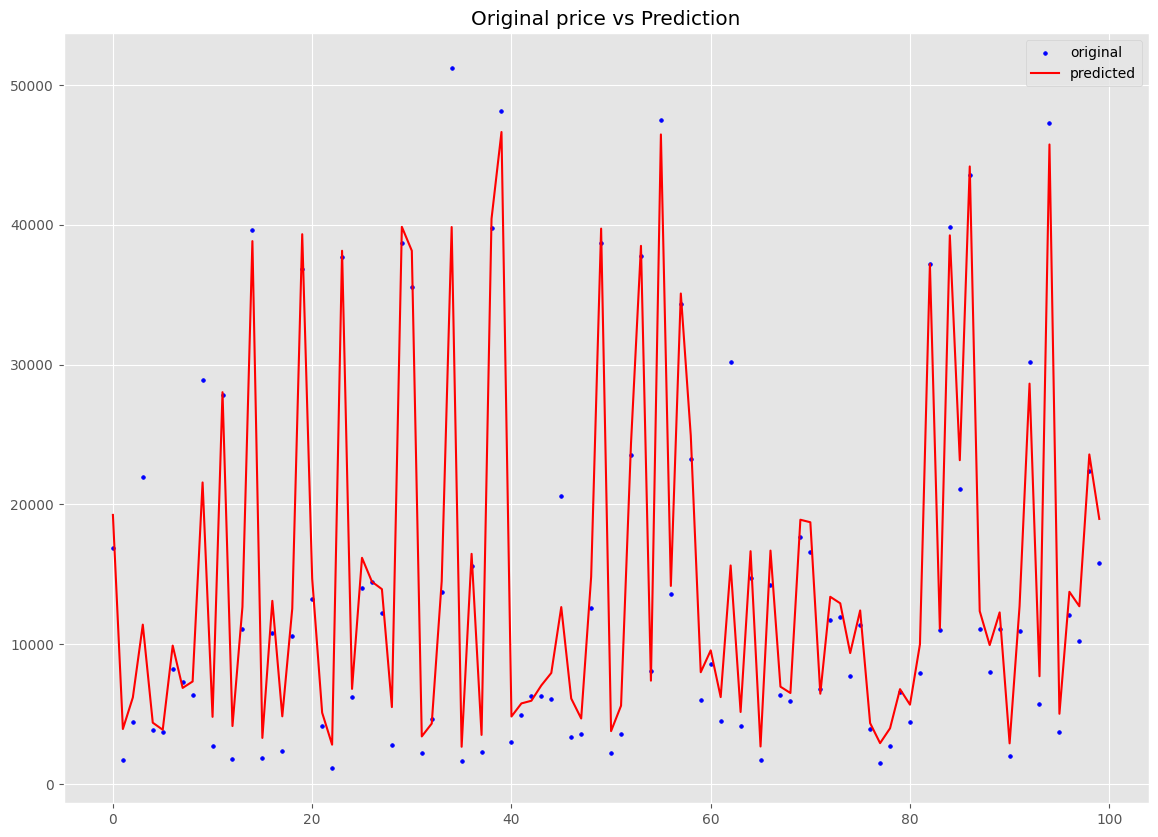

In [ ]:
# plot model predictions
x_ax = range(len(df['pred'].head(100)))
plt.figure(figsize=(14,10))
plt.title('Original price vs Prediction')
plt.scatter(x_ax, df['charges'].head(100), s=7, color="blue", label="original")
plt.plot(x_ax, df['pred'].head(100), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()